<a href="https://colab.research.google.com/github/st9ph8n/Quantopian/blob/main/lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: Instability of Parameter Estimates

## Lecture Link

This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Instability-of-Estimates

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera

# Set a seed so we can play with the data without generating new random numbers every time


# Exercise 1: Sample Size vs. Standard Deviation

Using the below normal distribution with mean 100 and standard deviation 50, find the means and standard deviations of  samples of size 5, 25, 100, and 500.

In [ ]:
POPULATION_MU = 100
POPULATION_SIGMA = 25
sample_sizes = [5, 25, 100, 500]

for i in range(len(sample_sizes)):
    sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_sizes[i])
    row = 'Mean:',(i+1), np.mean(sample), 'Std Dev:',(i+1) ,np.std(sample)
    print("{}{} {:<10f}  {}{} {}".format(*row))



Mean:1 121.981640  Std Dev:1 9.880186194391456
Mean:2 97.164202   Std Dev:2 20.01663515801631
Mean:3 97.990476   Std Dev:3 24.61173665260364
Mean:4 100.752116  Std Dev:4 24.51875879468


# Exercise 2: Instability of Predictions on Mean Alone

## a. Finding Means

Find the means of the following three data sets $X$, $Y$, and $Z$.

In [ ]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]

#Your code goes here

print (np.mean(X), np.mean(Y), np.mean(Z))

print( "Mean: %.2f" % np.mean(X))
print( "Mean: %.2f" % np.mean(Y))
print( "Mean: %.2f" % np.mean(Z))

25.0 24.686274509803923 25.607843137254903
Mean: 25.00
Mean: 24.69
Mean: 25.61


## b. Checking for Normality

Use the `jarque_bera` function to conduct a Jarque-Bera test on $X$, $Y$, and $Z$ to determine whether their distributions are normal.

In [ ]:
#Your code goes here
if jarque_bera(X)[1] > 0.05:
    print("X is normal")
else:
    print("X is not normal")
if jarque_bera(Y)[1] > 0.05:
    print("Y is normal")
else:
    print("Y is not normal")
if jarque_bera(Z)[1] > 0.05:
    print("Z is normal")
else:
    print("Z is not normal")



X is normal
Y is normal
Z is normal


## c. Instability of Estimates

Create a histogram of the sample distributions of $X$, $Y$, and $Z$ along with the best estimate/mean based on the sample.

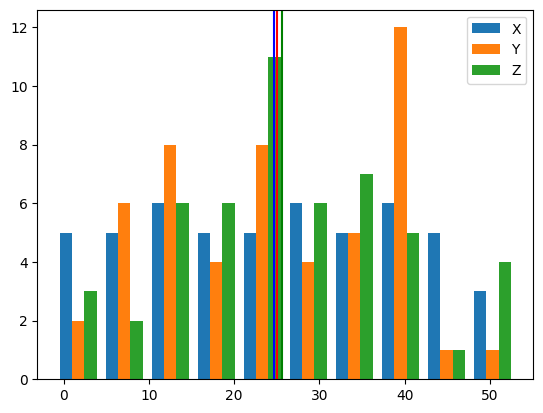

In [ ]:
#Your code goes here
plt.hist([X,Y,Z], bins=10, label=['X', 'Y', 'Z'])
plt.legend(loc='upper right')
plt.axvline(np.mean(X), color='r')
plt.axvline(np.mean(Y), color='b')
plt.axvline(np.mean(Z), color='g')
plt.show()


# Exercise 3: Sharpe Ratio Window Adjustment

## a. Effect on Variability

Just as in the lecture, find the mean and standard deviation of the running sharpe ratio for THO, this time testing for multiple window lengths: 300, 150, and 50. Restrict your mean and standard deviation calculation to pricing data up to 200 days away from the end.

In [ ]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2010-01-01'
end = '2015-01-01'
treasury = yf.download('BIL', start=start, end=end).pct_change()[1:]
pricing = yf.download('THO', start=start, end=end)
returns = pricing.pct_change()[1:]



for window in [50,150,300]:
  running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury[i-window+10:i]) for i in range(window-10, len(returns))]
  mean_rs = np.mean(running_sharpe[:-200])
  std_rs = np.std(running_sharpe[:-200])

  row = 'Mean:',(window), mean_rs, 'Std Dev:',(window), std_rs
  print("{}{} {:<10f}  {}{} {:<11f}".format(*row))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Mean:50 -4.953179   Std Dev:50 3.762121   
Mean:150 -4.912042   Std Dev:150 2.720270   
Mean:300 -5.015893   Std Dev:300 2.508954   


## b. Out-of-Sample Instability

Plot the running sharpe ratio of all three window lengths, as well as their in-sample mean and standard deviation bars.

In [ ]:
#Your code goes here

plt.plot(running_sharpe)
plt.axhline(np.mean(running_sharpe[:-200]), color='r')
plt.axhline(np.std(running_sharpe[:-200]), color='b')

# Exercise 4: Weather

## a. Temperature in Boston

Find the mean and standard deviation of Boston weekly average temperature data for the year of 2015 stored in `b15_df`.

In [ ]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

#Your code goes here


## b. Temperature in Palo Alto

Find the mean and standard deviation of Palo Alto weekly average temperature data for the year of 2015 stored in `p15_df`.

In [ ]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here


## c. Predicting 2016 Temperatures

Use the means you found in parts a and b to attempt to predict  2016 temperature data for both cities. Do this by creating two histograms for the 2016 temperature data in `b16_df` and `p16_df` with a vertical line where the 2015 means were to represent your prediction.

In [ ]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here


---

Congratulations on completing the instability of parameter estimates exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*